# Basic Usage


In [16]:
import sys
import os

sys.path.append(os.path.join(os.getcwd(), ".."))
from src.autora.theorist.g_1 import CustomMCMC
# autora state
from autora.state import StandardState, on_state, Delta

# experiment_runner
from autora.experiment_runner.synthetic.psychophysics.weber_fechner_law import weber_fechner_law
from autora.experiment_runner.synthetic.psychophysics.stevens_power_law import stevens_power_law
from autora.experiment_runner.synthetic.economics.expected_value_theory import expected_value_theory

# experimentalist
from autora.experimentalist.grid import grid_pool
from autora.experimentalist.random import random_pool, random_sample

# data handling
from sklearn.model_selection import train_test_split


Include inline mathematics like this: $4 < 5$

Include block mathematics like this (don't forget the empty lines above and below the block):

$$  
y + 1 = 4 
$$

... or this:

\begin{align}
    p(v_i=1|\mathbf{h}) & = \sigma\left(\sum_j w_{ij}h_j + b_i\right) \\
    p(h_j=1|\mathbf{v}) & = \sigma\left(\sum_i w_{ij}v_i + c_j\right)
\end{align}

# to call the fit function
args
conditions_train, observations_train


This will try to model and equation that uses the training conditions and gets the training observation.

## equation:  ['pow', '1.2458680792704842', '1.3798782111095589']
##--------------------- iteration:  0
## len_eqn:  3
## method:  root_addition
## equation:  ['-', 'pow', '1.2458680792704842', '1.3798782111095589', '2.0357385902267477']
## acceptance_prob:  0.0007087266442095331
##--------------------- iteration:  1
## len_eqn:  3
## method:  root_addition
## equation:  ['ln', 'pow', '1.2458680792704842', '1.3798782111095589']
## acceptance_prob:  0.06658919406424012
##--------------------- iteration:  2
## len_eqn:  3
## method:  node_replacement
## equation:  ['-', '1.2458680792704842', '1.3798782111095589']
## acceptance_prob:  0.011248635943263637
##--------------------- iteration:  3
## len_eqn:  3
## method:  root_addition
## equation:  ['-', 'pow', '1.2458680792704842', '1.3798782111095589', 'S']
## acceptance_prob:  2.3125417554623943e-06
##--------------------- iteration:  4
## len_eqn:  3
## method:  node_replacement
## equation:  ['pow', '1.2458680792704842', '1.12060344210

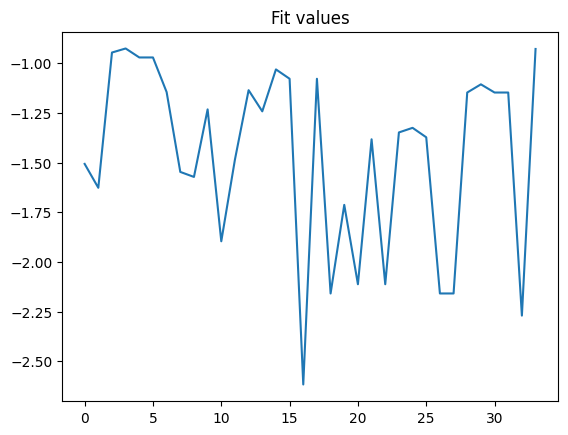

CustomMCMC()

In [17]:
experiment_runner = stevens_power_law()

conditions = experiment_runner.domain()
experiment_data = experiment_runner.run(conditions, added_noise=0.01)

# get the name of the independent and independent variables
ivs = [iv.name for iv in experiment_runner.variables.independent_variables]
dvs = [dv.name for dv in experiment_runner.variables.dependent_variables]
# extract the dependent variable (observations) from experiment data
conditions = experiment_data[ivs]
observations = experiment_data[dvs]

conditions_train, conditions_test, observations_train, observations_test = train_test_split(conditions, observations)

theorist=CustomMCMC()

theorist.fit(conditions_train, observations_train)

# to call the predict function
args
conditions_test

This will use the equation that we made using the fit fuction to predict results based on the test observations. 
We can compare the predictions to actual observation, to estimate the correctness of the model.

In [18]:
theorist.predict(conditions_test)

array([[2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145],
       [2.18285145]])

# to get the equation from the function
args:

This will print the equation estimated by the fit funciton.

In [19]:
theorist.print_eqn()

'2.182851452831034'

# -  4 points: Demonstrating that the theorist can recover at least two ground truth models.

In [20]:
def benchmark(experiment_runner, theorist):

  # generate all conditions
  conditions = experiment_runner.domain()

  # generate all corresponding observations
  experiment_data = experiment_runner.run(conditions, added_noise=0.01)

  # get the name of the independent and independent variables
  ivs = [iv.name for iv in experiment_runner.variables.independent_variables]
  dvs = [dv.name for dv in experiment_runner.variables.dependent_variables]

  # extract the dependent variable (observations) from experiment data
  conditions = experiment_data[ivs]
  observations = experiment_data[dvs]

  # split into train and test datasets
  conditions_train, conditions_test, observations_train, observations_test = train_test_split(conditions, observations)

  print("#### EXPERIMENT CONDITIONS (X):")
  print(conditions)
  print("#### EXPERIMENT OBSERVATIONS (Y):")
  print(observations)

  # fit theorist
  theorist.fit(conditions_train, observations_train)

  # compute prediction for validation set
  predictions = theorist.predict(conditions_test)

  print("#### PREDICTIONS:")
  print(predictions)
  # evaluate theorist performance
  error = (predictions - observations_test).pow(2)
  error = error.mean()

  print("#### IDENTIFIED EQUATION:")
  print(theorist.print_eqn())

  print("#### VALIDATION SET MSE:")
  print(error)

  experiment_runner.plotter(model=theorist)

In [21]:
# run benchmark
benchmark(experiment_runner = stevens_power_law(), theorist = theorist)

NameError: name 'dummy_theorist' is not defined

In [ ]:
# run benchmark
benchmark(experiment_runner = weber_fechner_law(), theorist = dummy_theorist)